## Visualisasi Awal Data: Scatterplot

Visualisasi scatterplot antara variabel **Jumlah Murid SMA** dan **PDRB Harga Konstan** dari dataset yang telah dibersihkan untuk memahami distribusi awal dari data sebelum diklasterisasi:


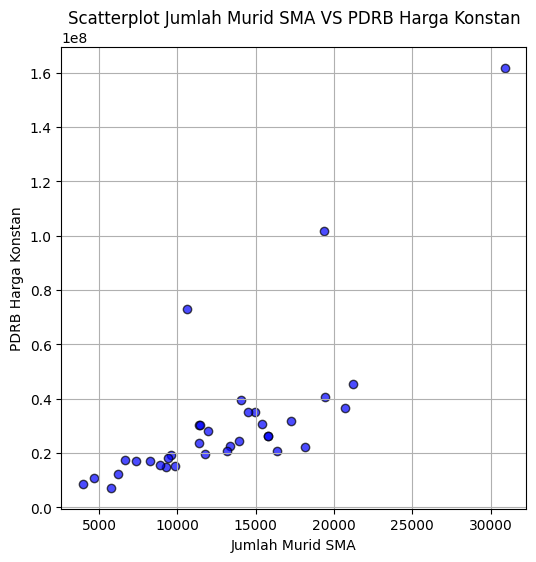

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dengan skala asli
data_clean = pd.read_csv('../../Dataset/data_cleaned.csv')

# Mengambil kolom yang akan digunakan untuk klasterisasi
X_original = data_clean[['Jumlah_Murid_SMA', 'PDRB_harga_konstan']] 

plt.figure(figsize=(6,6))
plt.scatter(X_original['Jumlah_Murid_SMA'], X_original['PDRB_harga_konstan'], 
            c='blue', edgecolor='k', alpha=0.7)
plt.title('Scatterplot Jumlah Murid SMA VS PDRB Harga Konstan')
plt.xlabel('Jumlah Murid SMA')
plt.ylabel('PDRB Harga Konstan')
plt.grid(True)
plt.show()


## Model K-Means untuk Berbagai Jumlah Klaster

Analisis clustering menggunakan K-Means pada fitur Jumlah Murid SMA dan PDRB Harga Konstan dengan jumlah klaster (K) dari 2 sampai 10. Untuk setiap K, model dievaluasi menggunakan Davies-Bouldin Index dan Silhouette Score, lalu masing-masing model disimpan.


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import joblib

# Load dataset
case_data = pd.read_csv("../../Dataset/data_normalized.csv")

# Fitur untuk clustering
X_scaled = case_data[['Jumlah_Murid_SMA', 'PDRB_harga_konstan']]

# Lists untuk menyimpan skor
davies_bouldin_scores = []
silhouette_scores = []

# Dictionary untuk menyimpan model tiap K
models = {}

# Mulai dari K = 2
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    
    # Davies-Bouldin Index
    db_score = davies_bouldin_score(X_scaled, kmeans.labels_)
    davies_bouldin_scores.append(db_score)
    
    # Silhouette Score
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(sil_score)
    
    # Menyimpan model ke dictionary dan file
    models[k] = kmeans
    filename = f'model/model_k{k}.pkl'
    joblib.dump(kmeans, filename)

# Hasil evaluasi
print("Hasil Evaluasi KMeans Clustering:\n")
print(f"{'K':<3} {'Davies-Bouldin':<20} {'Silhouette Score':<20}")
print("-" * 45)
for idx, k in enumerate(range(2, 11)):
    db_value = davies_bouldin_scores[idx]
    sil_value = silhouette_scores[idx]
    print(f"{k:<3} {db_value:<20} {sil_value:<20}")



Hasil Evaluasi KMeans Clustering:

K   Davies-Bouldin       Silhouette Score    
---------------------------------------------
2   0.8835318965629858   0.4266630508311669  
3   0.5874147398178696   0.4849181778949865  
4   0.6906642607703972   0.4332594760809179  
5   0.7675642015703923   0.39571620158162024 
6   0.5828069645867273   0.4415779187352644  
7   0.4095359493096965   0.44085300166704244 
8   0.4129878783939167   0.45011561637734226 
9   0.3903219390828095   0.4583158934385874  
10  0.4091784963556104   0.4740297331573018  


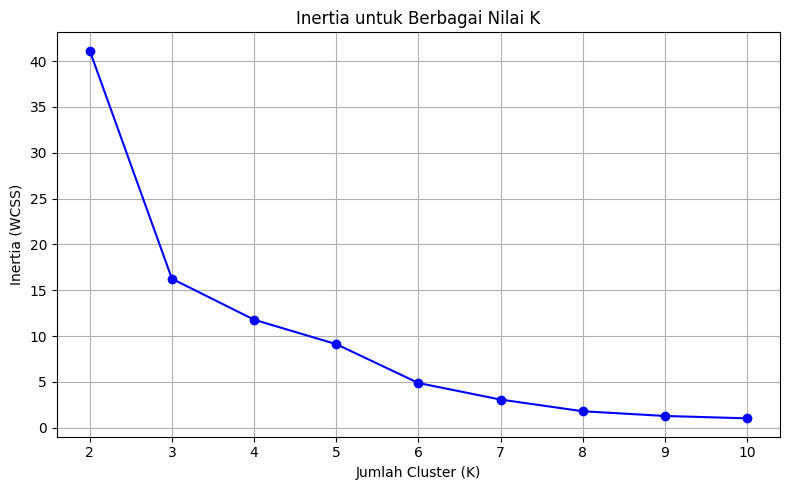

In [3]:
import matplotlib.pyplot as plt

# Load model dari dict
inertia_scores = [models[k].inertia_ for k in models.keys()]
ks = list(models.keys())

# Visualisasi Inertia
plt.figure(figsize=(8,5))
plt.plot(ks, inertia_scores, 'o-', color='blue')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Inertia untuk Berbagai Nilai K')
plt.grid(True)
plt.tight_layout()
plt.show()


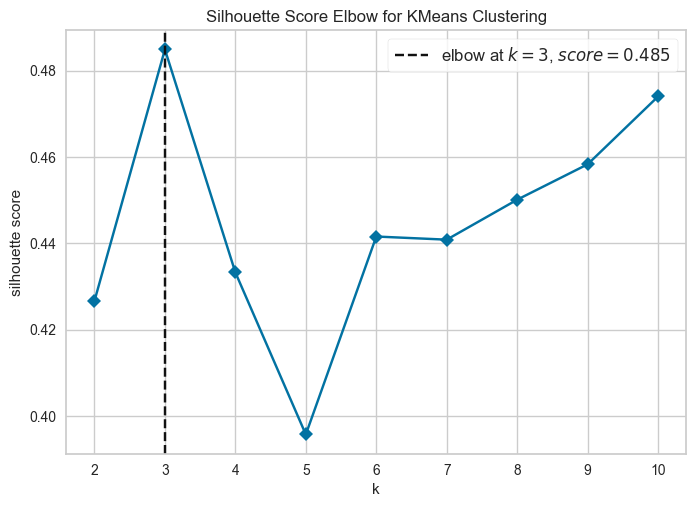

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd

# Load dataset
case_data = pd.read_csv("../../Dataset/data_normalized.csv")

# Fitur untuk clustering
X_scaled = case_data[['Jumlah_Murid_SMA', 'PDRB_harga_konstan']]

# Inisialisasi model KMeans
model = KMeans(random_state=42, n_init='auto')

# Visualizer elbow untuk metrik silhouette
visualizer = KElbowVisualizer(model, k=(2, 11), metric='silhouette', timings=False)

# Fit dan menampilkan visualisasi
visualizer.fit(X_scaled)
visualizer.show()
plt.show()


Cluster_KMeans
1    12
2    21
3     2
Name: count, dtype: int64


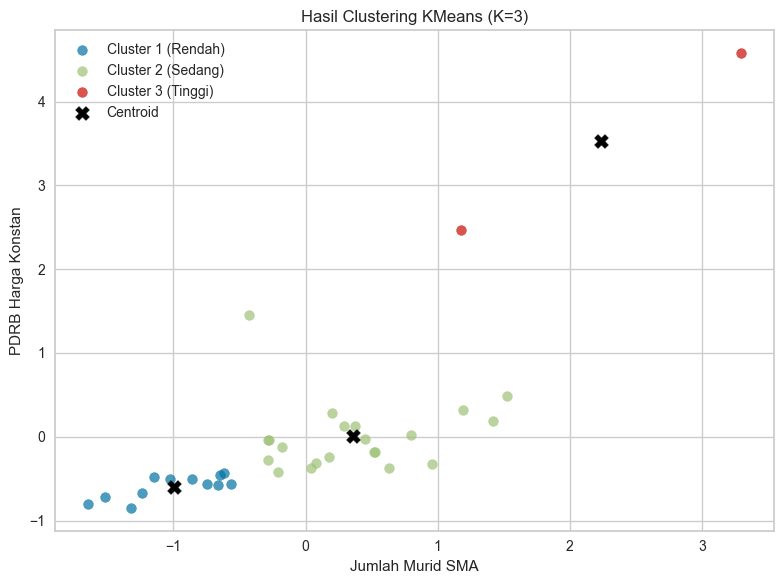

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import numpy as np

# Load dataset
case_data = pd.read_csv("../../Dataset/data_normalized.csv")
X_scaled = case_data[['Jumlah_Murid_SMA', 'PDRB_harga_konstan']]

# Load model KMeans dengan K=3
kmeans = joblib.load('model/model_k3.pkl')

# Prediksi label awal
initial_labels = kmeans.predict(X_scaled)

# Jumlah fitur pada tiap centroid
centroid_scores = kmeans.cluster_centers_.sum(axis=1)

# Urutkan centroid berdasarkan jumlah total (rendah ke tinggi)
sorted_indices = np.argsort(centroid_scores)  # hasilnya: [low, medium, high]

# Mapping: label dengan nilai terendah → 1, sedang → 2, tertinggi → 3
remap = {old: new + 1 for new, old in enumerate(sorted_indices)}

# Terapkan mapping ke label hasil prediksi
remapped_labels = [remap[label] for label in initial_labels]
case_data['Cluster_KMeans'] = remapped_labels

# Tampilkan jumlah anggota per cluster
print(case_data['Cluster_KMeans'].value_counts().sort_index())

# Buat dictionary label deskriptif
label_names = {
    1: 'Rendah',
    2: 'Sedang',
    3: 'Tinggi'
}

# Visualisasi hasil cluster
plt.figure(figsize=(8, 6))

# Plot masing-masing cluster dengan label deskriptif
for cluster_id in sorted(case_data['Cluster_KMeans'].unique()):
    cluster_data = X_scaled[case_data['Cluster_KMeans'] == cluster_id]
    plt.scatter(
        cluster_data['Jumlah_Murid_SMA'], 
        cluster_data['PDRB_harga_konstan'], 
        s=50, 
        alpha=0.7, 
        label=f'Cluster {cluster_id} ({label_names[cluster_id]})'
    )

# Plot centroid
# Sesuaikan urutan centroid agar sesuai remap (urutkan ulang berdasarkan label baru)
reordered_centroids = np.zeros_like(kmeans.cluster_centers_)
for old_label, new_label in remap.items():
    reordered_centroids[new_label - 1] = kmeans.cluster_centers_[old_label]

plt.scatter(
    reordered_centroids[:, 0], 
    reordered_centroids[:, 1], 
    s=100, 
    c='black', 
    marker='X', 
    label='Centroid'
)

plt.title('Hasil Clustering KMeans (K=3)')
plt.xlabel('Jumlah Murid SMA')
plt.ylabel('PDRB Harga Konstan')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
import folium
import joblib
import numpy as np

# Load dataset
case_data = pd.read_csv("../../Dataset/data_normalized.csv")
X_scaled = case_data[['Jumlah_Murid_SMA', 'PDRB_harga_konstan']]

# Load model KMeans K=3
kmeans = joblib.load('model/model_k3.pkl')

# Prediksi label awal
initial_labels = kmeans.predict(X_scaled)

# Hitung skor centroid untuk remap (jumlah fitur)
centroid_scores = kmeans.cluster_centers_.sum(axis=1)

# Urutkan indeks centroid dari terendah ke tertinggi
sorted_indices = np.argsort(centroid_scores)

# Buat mapping: nilai rendah → 1, sedang → 2, tinggi → 3
remap = {old: new + 1 for new, old in enumerate(sorted_indices)}

# Terapkan mapping ke label hasil prediksi
case_data['Cluster_KMeans'] = [remap[label] for label in initial_labels]

# Warna untuk setiap cluster baru (Cluster 1 = rendah, 2 = sedang, 3 = tinggi)
cluster_colors = {
    1: 'red',     # rendah
    2: 'orange',  # sedang
    3: 'green'    # tinggi
}

# Buat peta
map_center = [case_data['latitude'].mean(), case_data['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=8)

# Tambahkan marker ke peta
for idx, row in case_data.iterrows():
    cluster_number = row['Cluster_KMeans']
    color = cluster_colors.get(cluster_number, 'gray')  # default color

    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['kab_kota']} (Cluster {cluster_number})",
        icon=folium.DivIcon(html=f"""
            <div style="
                font-size: 12pt;
                color: white;
                background-color: {color};
                border-radius: 50%;
                width: 24px;
                height: 24px;
                text-align: center;
                line-height: 24px;
                border: 2px solid white;
            ">
                {cluster_number}
            </div>
        """)
    ).add_to(m)

# Simpan peta ke file HTML
m.save('../../Output/kmeans_map.html')

# Tampilkan peta
m


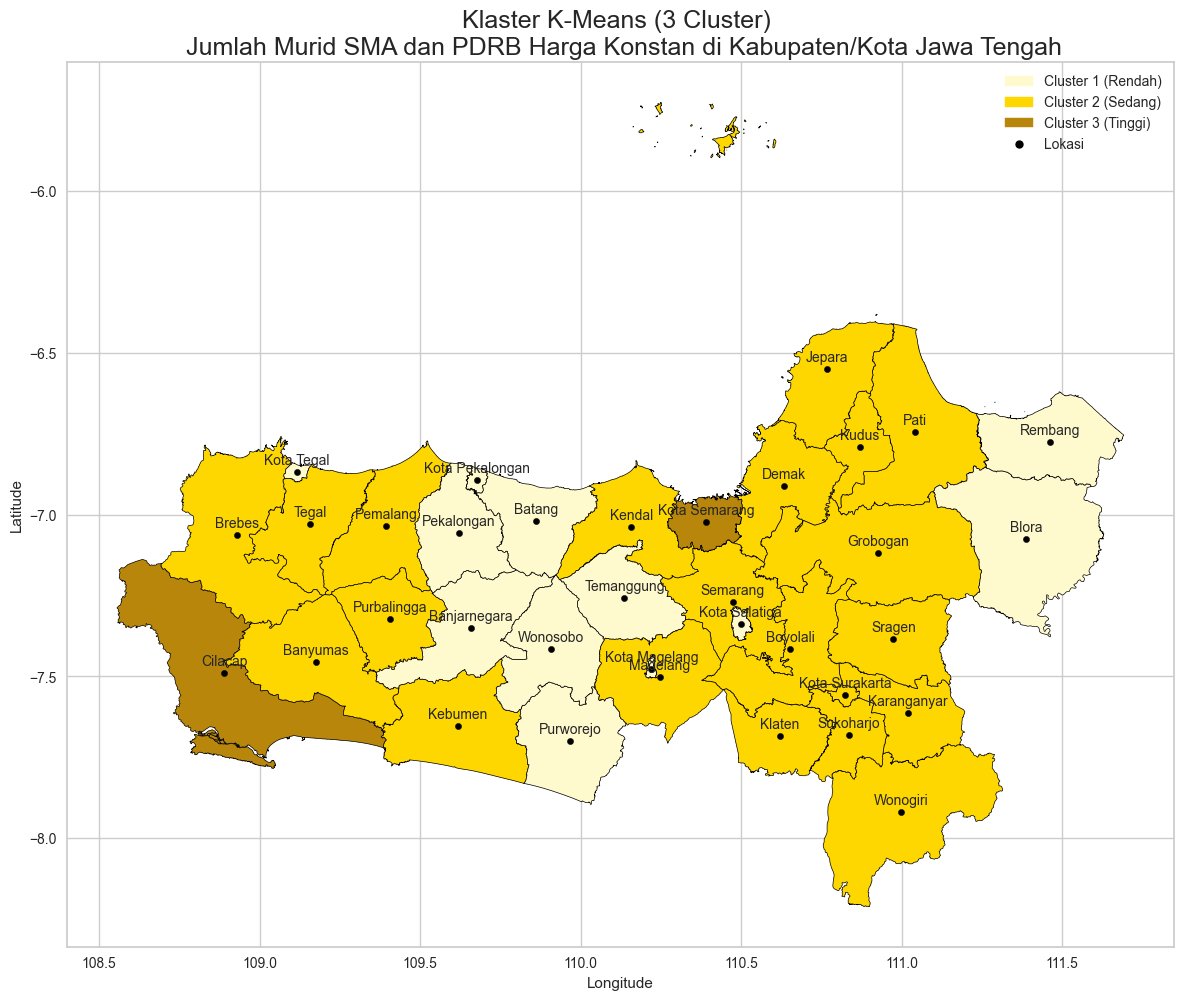

In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import joblib

# Load data utama
case_data = pd.read_csv("../../Dataset/data_normalized.csv")
X_scaled = case_data[['Jumlah_Murid_SMA', 'PDRB_harga_konstan']]

# Load model KMeans (K=3)
kmeans = joblib.load('model/model_k3.pkl')
case_data['Cluster_KMeans_raw'] = kmeans.predict(X_scaled)

# Hitung urutan klaster berdasarkan rata-rata (gabungan)
cluster_means = case_data.groupby('Cluster_KMeans_raw')[['Jumlah_Murid_SMA', 'PDRB_harga_konstan']].mean()
cluster_means['avg'] = cluster_means.mean(axis=1)
ordered_clusters = cluster_means.sort_values('avg').index.tolist()  # dari terkecil ke terbesar

# Buat mapping: cluster_kmeans_raw → level 1 (rendah), 2 (sedang), 3 (tinggi)
cluster_rank_map = {raw_cluster: rank + 1 for rank, raw_cluster in enumerate(ordered_clusters)}
case_data['Cluster_KMeans'] = case_data['Cluster_KMeans_raw'].map(cluster_rank_map)

# Gabungkan dengan GeoDataFrame shapefile
gdf = gpd.read_file("../../Dataset/Lokasi/KAB_KOTA_JATENG.shp")
merged = gdf.merge(case_data, on="kab_kota")

# Warna: terang (rendah) ke gelap (tinggi)
colors_list = ['#FFFACD', '#FFD700', '#B8860B']
cluster_colors = {1: colors_list[0], 2: colors_list[1], 3: colors_list[2]}
merged['color'] = merged['Cluster_KMeans'].map(cluster_colors)

# Buat legend
patches = [
    mpatches.Patch(color=cluster_colors[i], label=f'Cluster {i} ({"Rendah" if i==1 else "Sedang" if i==2 else "Tinggi"})')
    for i in range(1, 4)
]

# Plot
fig, ax = plt.subplots(figsize=(12, 10))
merged.plot(ax=ax, color=merged['color'], edgecolor='black', linewidth=0.5)

# Titik lokasi
ax.scatter(merged['longitude'], merged['latitude'], color='black', s=20, label='Lokasi')

# Label kabupaten/kota
for _, row in merged.iterrows():
    ax.text(row['longitude'], row['latitude'] + 0.015, row['kab_kota'], fontsize=10, ha='center', va='bottom')

# Legend dan judul
plt.legend(handles=patches + [
    plt.Line2D([0], [0], marker='o', color='w', label='Lokasi', markerfacecolor='black', markersize=6)
], loc='best')

plt.title("Klaster K-Means (3 Cluster) \n Jumlah Murid SMA dan PDRB Harga Konstan di Kabupaten/Kota Jawa Tengah", fontsize=18)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()

plt.savefig('../../Output/Peta_klaster_kmeans.png', format='png', dpi=600)

plt.show()
